<a href="https://colab.research.google.com/github/Adithyadk/ML_Lab/blob/main/ML_Lab_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

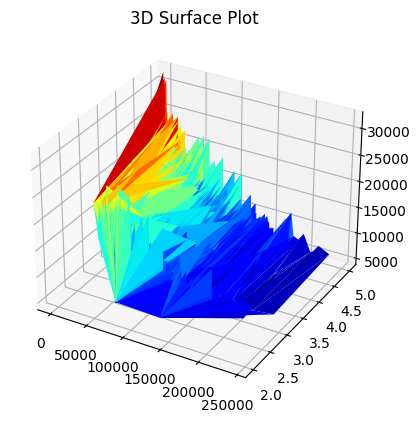

In [ ]:
# 3-D Plot

import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/ToyotaCorolla.csv')
x = dataset['KM']
y = dataset['Doors']
z = dataset['Price']

ax = plt.axes(projection='3d')
ax.plot_trisurf(x,y,z,cmap="jet")
ax.set_title("3D Surface Plot")

plt.show()

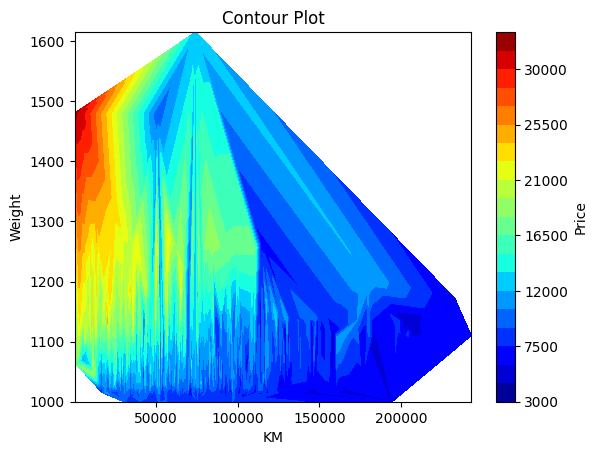

In [ ]:
# Contour Plot

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/ToyotaCorolla.csv')
x = dataset['KM']
y = dataset['Weight']
z = dataset['Price']

plt.tricontourf(x, y, z, levels=20, cmap='jet')
plt.colorbar(label='Price')
plt.xlabel('KM')
plt.ylabel('Weight')
plt.title('Contour Plot')
plt.show()

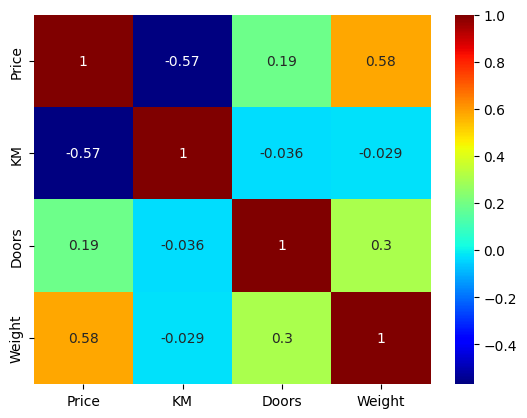

In [ ]:
# Heatmap

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("./ToyotaCorolla.csv")

sns.heatmap(data[["Price","KM","Doors", "Weight"]].corr(),annot=True,cmap='jet')
plt.show()

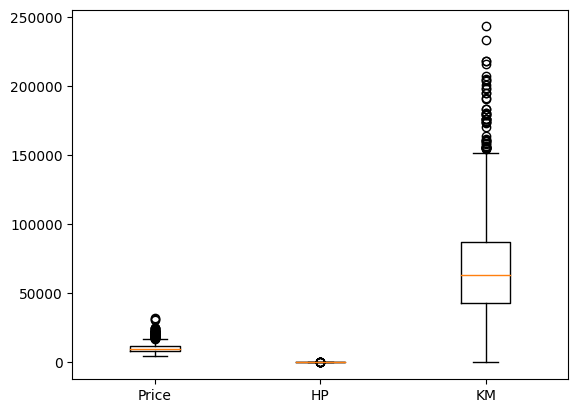

In [ ]:
# Box Plot

import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('./ToyotaCorolla.csv')

plt.boxplot([data["Price"],data["HP"],data["KM"]])

plt.xticks([1,2,3],["Price","HP","KM"])

plt.show()

In [ ]:
# 1.Best First Search
def best_first_search(graph,start,goal,heuristic, path=[]):
    open_list = [(0,start)]
    closed_list = set()
    closed_list.add(start)

    while open_list:
        open_list.sort(key = lambda x: heuristic[x[1]], reverse=True)
        cost, node = open_list.pop()
        path.append(node)

        if node==goal:
            return cost, path

        closed_list.add(node)
        for neighbour, neighbour_cost in graph[node]:
            if neighbour not in closed_list:
                closed_list.add(node)
                open_list.append((cost+neighbour_cost, neighbour))

    return None

# Define a smaller graph
graph = {
    'S': [('A', 1), ('B', 4)],
    'A': [('C', 2), ('D', 5)],
    'B': [('D', 1)],
    'C': [('G', 3)],
    'D': [('G', 2)],
    'G': []  # Goal node
}

# Define the heuristic values for each node
heuristic = {
    'S': 7,
    'A': 6,
    'B': 2,
    'C': 1,
    'D': 3,
    'G': 0  # Heuristic value for goal node is always 0
}

# Start and goal nodes
start = 'S'
goal = 'G'

# Perform the best first search
result = best_first_search(graph, start, goal, heuristic)

# Output the result
if result:
    print(f"Minimum cost path from {start} to {goal} is {result[1]}")
    print(f"Cost: {result[0]}")
else:
    print(f"No path from {start} to {goal}")


Minimum cost path from S to G is ['S', 'B', 'D', 'G']
Cost: 7


In [ ]:
# 2. A-Star Algorithm

def h(n):
    H = {'S': 7,'A': 6,'B': 2,'C': 1,'D': 3,'G': 0}
    return H[n]

def a_star_algorithm(graph, start, goal):

    open_list = [start]
    closed_list = set()

    g = {start:0}

    parents = {start:start}

    while open_list:

        open_list.sort(key=lambda v: g[v] + h(v), reverse=True)
        n = open_list.pop()

        # If node is goal then construct the path and return
        if n == goal:
            reconst_path = []

            while parents[n] != n:
                reconst_path.append(n)
                n = parents[n]

            reconst_path.append(start)
            reconst_path.reverse()

            print(f'Path found: {reconst_path}')
            print(f'Cost: {g[goal]}')   # Cost Printing
            return reconst_path

        for (m, weight) in graph[n]:
        # if m is first visited, add it to open_list and note its parent
            if m not in open_list and m not in closed_list:
                open_list.append(m)
                parents[m] = n
                g[m] = g[n] + weight

            # otherwise, check if it's quicker to first visit n, then m
            # and if it is, update parent and g data
            # and if the node was in the closed_list, move it to open_list
            else:
                if g[m] > g[n] + weight:
                    g[m] = g[n] + weight
                    parents[m] = n

                    if m in closed_list:
                        closed_list.remove(m)
                        open_list.append(m)

        # Node's neighbours are visited. Now put node to closed list.
        closed_list.add(n)

    print('Path does not exist!')
    return None


graph = {
    'S': [('A', 1), ('B', 4)],
    'A': [('C', 2), ('D', 5)],
    'B': [('D', 1)],
    'C': [('G', 3)],
    'D': [('G', 2)],
    'G': []  # Goal node
}

a_star_algorithm(graph, 'S', 'G')

Path found: ['S', 'A', 'C', 'G']
Cost: 6


['S', 'A', 'C', 'G']

In [ ]:
# 3. Min-Max Algorithm

def minmax(depth, nodeIndex, maximizingPlayer, values, alpha, beta, path):
    if depth == 3:
        return values[nodeIndex], path + [nodeIndex]

    if maximizingPlayer:
        best = float('-inf')
        best_path = []
        for i in range(2):
            val, new_path = minmax(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta, path + [nodeIndex])
            if val > best:
                best = val
                best_path = new_path
        return best, best_path
    else:
        best = float('inf')
        best_path = []
        for i in range(2):
            val, new_path = minmax(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta, path + [nodeIndex])
            if val < best:
                best = val
                best_path = new_path
        return best, best_path

# Example tree with depth 3 and 8 terminal nodes
values = [3, 5, 2, 9, 12, 5, 23, 23]

# Start the Min-Max algorithm
optimal_value, optimal_path = minmax(0, 0, True, values, float('-inf'), float('inf'), [])
print("The optimal value is:", optimal_value)
print("The path taken is:", optimal_path)

The optimal value is: 12
The path taken is: [0, 1, 2, 4]


In [ ]:
# 4. Alpha-Beta Algorithm

def alpha_beta(depth, nodeIndex, maximizingPlayer, values, alpha, beta, path):
    if depth == 3:
        return values[nodeIndex], path + [nodeIndex]

    if maximizingPlayer:
        best = float('-inf')
        best_path = []
        for i in range(2):
            val, new_path = alpha_beta(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta, path + [nodeIndex])
            if val > best:
                best = val
                best_path = new_path

            alpha=max(alpha,best)
            if alpha>=beta:
              print(f"Pruning:{path+[nodeIndex]}")
              break

        return best, best_path

    else:
        best = float('inf')
        best_path = []
        for i in range(2):
            val, new_path = alpha_beta(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta, path + [nodeIndex])
            if val < best:
                best = val
                best_path = new_path

            beta=min(beta,best)
            if alpha>=beta:
              print(f"Pruning:{path+[nodeIndex]}")
              break

        return best, best_path

# Example tree with depth 3 and 8 terminal nodes
values = [3, 5, 2, 9, 12, 5, 23, 23]

# Start the Alpha-Beta algorithm
optimal_value, optimal_path = alpha_beta(0, 0, True, values, float('-inf'), float('inf'), [])
print("The optimal value is:", optimal_value)
print("The path taken is:", optimal_path)

Pruning:[0, 0, 1]
Pruning:[0, 1, 3]
The optimal value is: 12
The path taken is: [0, 1, 2, 4]


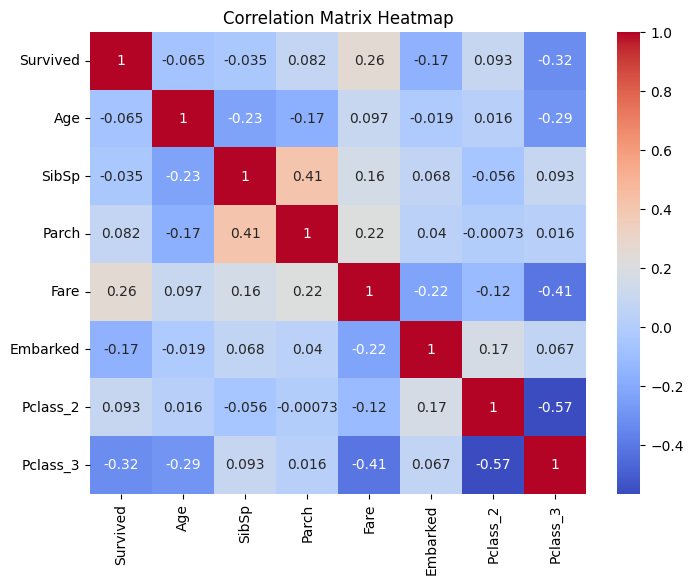

Confusion Matrix:
 [[78 27]
 [35 39]]
Accuracy: 0.6536312849162011


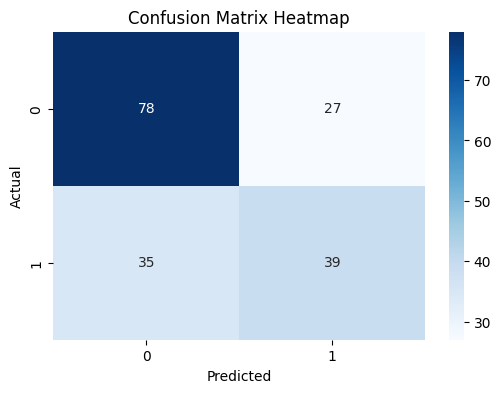

In [ ]:
# 4. Naive Bayes Classifier - Titanic Dataset

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("titanic.csv")
df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Handle missing values
imputer = SimpleImputer(strategy='median')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])

# Fill missing 'Embarked' values with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode 'Embarked' column
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Normalize numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Encode the 'Pclass' column using one-hot encoding
df = pd.get_dummies(df, columns=['Pclass'], drop_first=True)

# Plot the correlation matrix heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Split the data into train and test sets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.

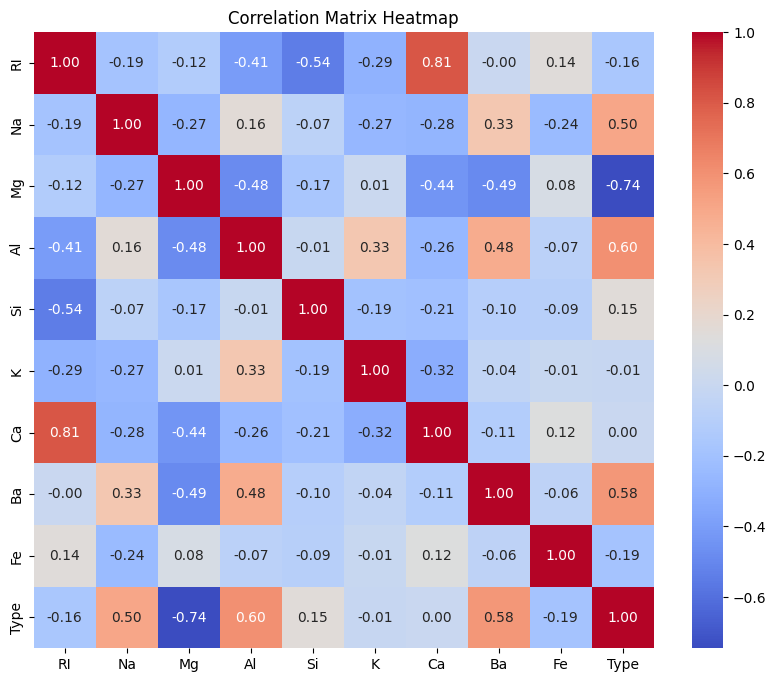

Accuracy with Euclidean Distance: 0.6615384615384615
Accuracy with Manhattan Distance: 0.6923076923076923


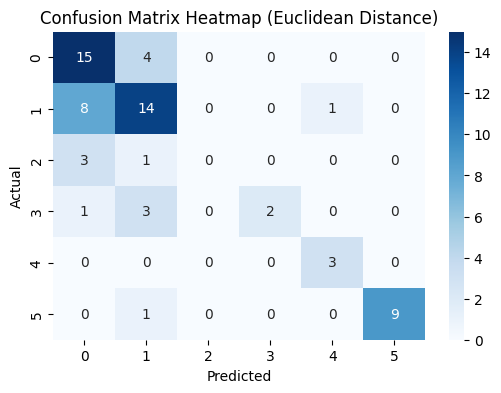

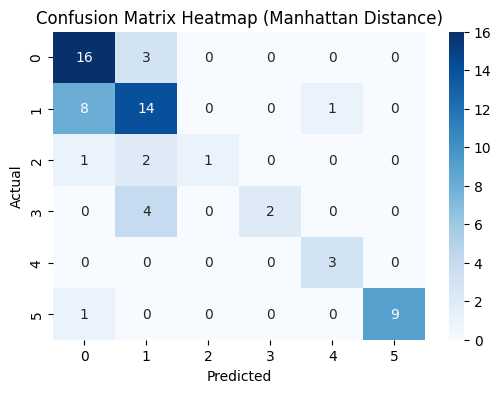

In [ ]:
# 5. KNN Classifier - Glass Dataset

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('glass.csv')

# Display basic information and statistics
print(df.info())
print(df.describe())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Handle missing values by imputing with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df[df.columns])

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Type', axis=1))

# Alternatively, you can use MinMaxScaler
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(df.drop('Type', axis=1))

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Assign features and target variable
y = df['Type'].values
X = X_scaled

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define custom distance functions
def custom_euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def custom_manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# Initialize the KNN classifiers with custom distances
k = 3  # Number of neighbors
clf_custom_euclidean = KNeighborsClassifier(n_neighbors=k, metric=custom_euclidean_distance)
clf_custom_manhattan = KNeighborsClassifier(n_neighbors=k, metric=custom_manhattan_distance)

# Fit the KNN classifiers to the training data
clf_custom_euclidean.fit(X_train, y_train)
clf_custom_manhattan.fit(X_train, y_train)

# Make predictions on the test set with custom distances
predictions_custom_euclidean = clf_custom_euclidean.predict(X_test)
predictions_custom_manhattan = clf_custom_manhattan.predict(X_test)

# Calculate accuracy with custom distances
accuracy_custom_euclidean = accuracy_score(y_test, predictions_custom_euclidean)
accuracy_custom_manhattan = accuracy_score(y_test, predictions_custom_manhattan)
print("Accuracy with Euclidean Distance:", accuracy_custom_euclidean)
print("Accuracy with Manhattan Distance:", accuracy_custom_manhattan)

# Calculate confusion matrices for both classifiers
cm_custom_euclidean = confusion_matrix(y_test, predictions_custom_euclidean)
cm_custom_manhattan = confusion_matrix(y_test, predictions_custom_manhattan)

# Plotting the confusion matrix for Custom Euclidean distance
plt.figure(figsize=(6, 4))
sns.heatmap(cm_custom_euclidean, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Euclidean Distance)')
plt.show()

# Plotting the confusion matrix for Custom Manhattan distance
plt.figure(figsize=(6, 4))
sns.heatmap(cm_custom_manhattan, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Manhattan Distance)')
plt.show()

    Outlook Temperature Humidity   Windy Play
0     Sunny         Hot     High    Weak   No
1     Sunny         Hot     High  Strong   No
2  Overcast         Hot     High    Weak  Yes
3      Rain        Mild     High    Weak  Yes
4      Rain        Cool   Normal    Weak  Yes


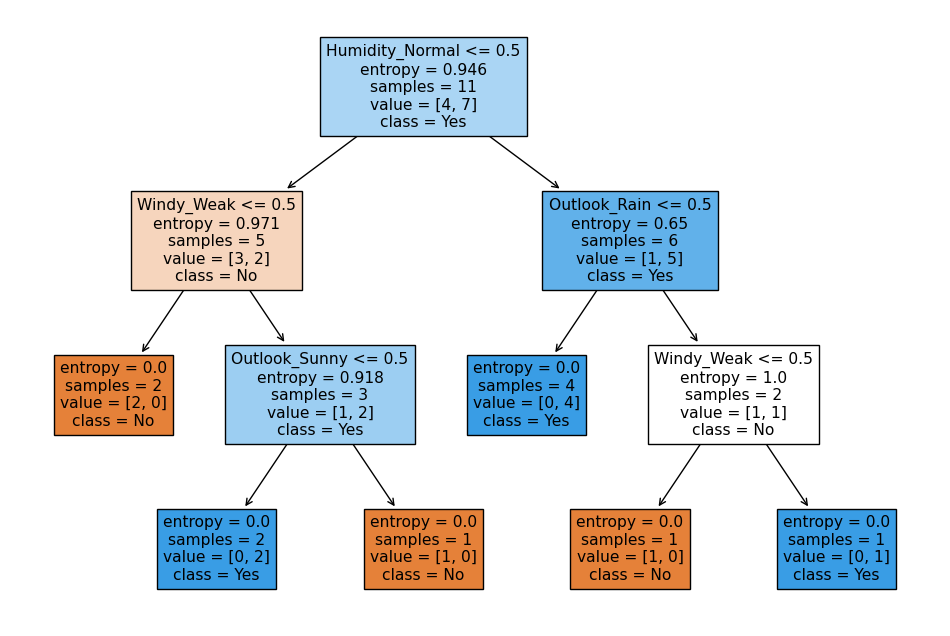

ID3 Algorithm Results:
Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Cross-Validation Scores (ID3): [0.66666667 1.         0.66666667 0.33333333 1.        ]
Mean CV Accuracy (ID3): 0.7333333333333333


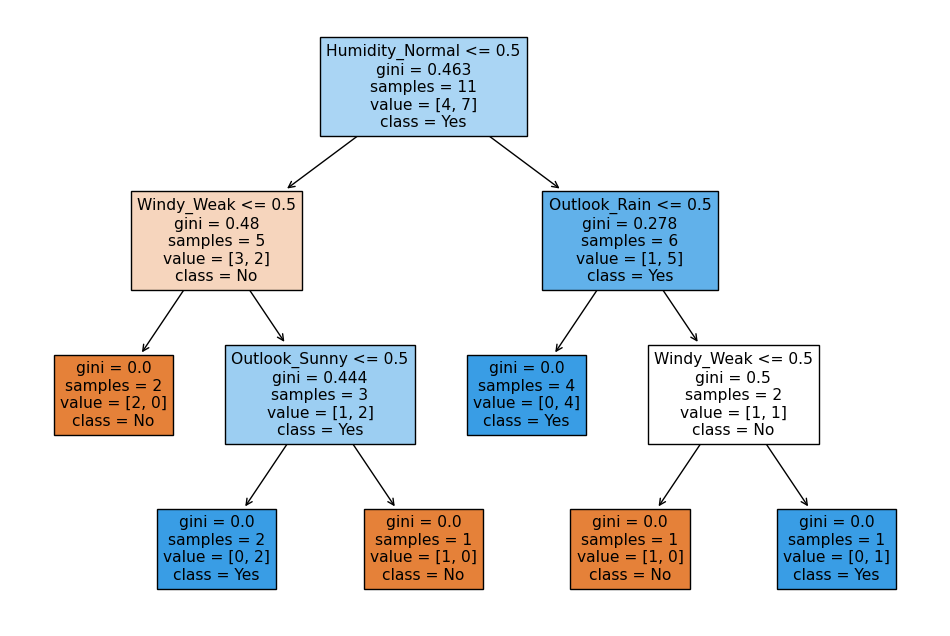

CART Algorithm Results:
Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Cross-Validation Scores (CART): [0.66666667 1.         0.66666667 0.33333333 1.        ]
Mean CV Accuracy (CART): 0.7333333333333333


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

# Load the weather dataset from the local file
file_path = r"/content/weather.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Preprocessing: convert categorical variables to numerical using one-hot encoding
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(df.drop('Play', axis=1)).toarray()
y = df['Play']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier with ID3 algorithm
clf_id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the ID3 classifier to the training data
clf_id3.fit(X_train, y_train)

# Visualize the ID3 decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_id3, filled=True, feature_names=encoder.get_feature_names_out(['Outlook', 'Temperature', 'Humidity', 'Windy']), class_names=['No', 'Yes'])
plt.show()

# Predict the labels for the test set using ID3
y_pred_id3 = clf_id3.predict(X_test)

# Evaluate the ID3 model
accuracy_id3 = accuracy_score(y_test, y_pred_id3)
report_id3 = classification_report(y_test, y_pred_id3)

print("ID3 Algorithm Results:")
print(f"Accuracy: {accuracy_id3}")
print(f"Classification Report:\n{report_id3}")

# Perform cross-validation for ID3
cv_scores_id3 = cross_val_score(clf_id3, X_encoded, y, cv=5)
print("Cross-Validation Scores (ID3):", cv_scores_id3)
print("Mean CV Accuracy (ID3):", cv_scores_id3.mean())

# Initialize the decision tree classifier with CART algorithm
clf_cart = DecisionTreeClassifier(criterion='gini', random_state=42)

# Fit the CART classifier to the training data
clf_cart.fit(X_train, y_train)

# Visualize the CART decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_cart, filled=True, feature_names=encoder.get_feature_names_out(['Outlook', 'Temperature', 'Humidity', 'Windy']), class_names=['No', 'Yes'])
plt.show()

# Predict the labels for the test set using CART
y_pred_cart = clf_cart.predict(X_test)

# Evaluate the CART model
accuracy_cart = accuracy_score(y_test, y_pred_cart)
report_cart = classification_report(y_test, y_pred_cart)

print("CART Algorithm Results:")
print(f"Accuracy: {accuracy_cart}")
print(f"Classification Report:\n{report_cart}")

# Perform cross-validation for CART
cv_scores_cart = cross_val_score(clf_cart, X_encoded, y, cv=5)
print("Cross-Validation Scores (CART):", cv_scores_cart)
print("Mean CV Accuracy (CART):", cv_scores_cart.mean())

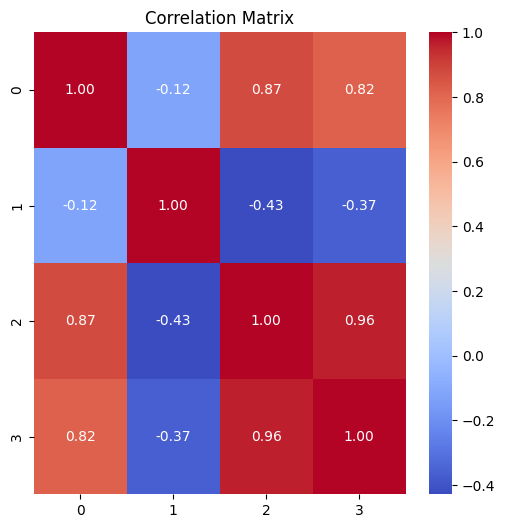

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Labels: [0. 1. 2. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 1. 1. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
Centroids: [[-0.60641634  1.90690616 -1.27526947 -1.21201901]
 [-0.79163009 

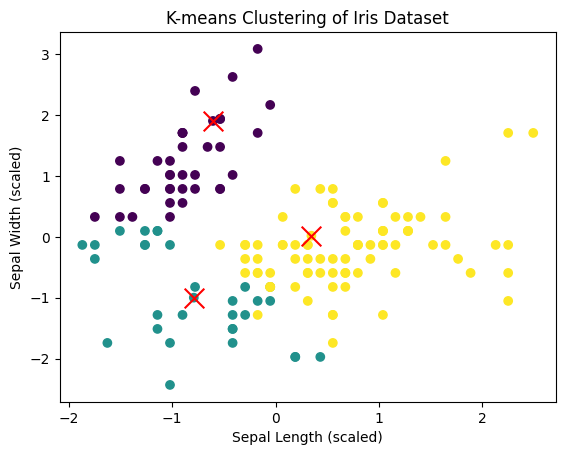

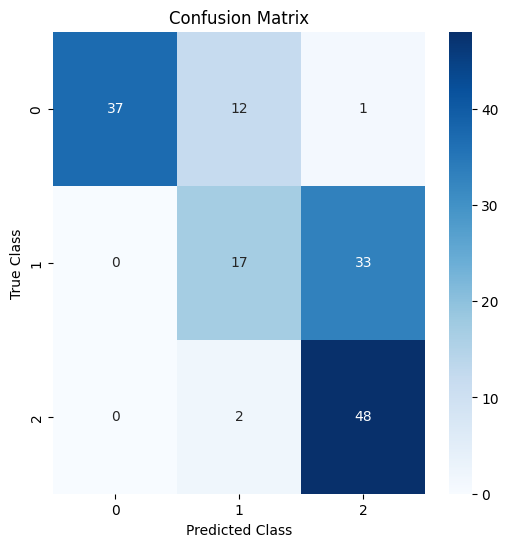

The accuracy is:  0.68


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

def kmeans(X, K):
    # Step 1: Initialize centroids with the first K samples
    centroids = X[:K]

    # Step 1: Assign the remaining n-K samples to the nearest centroid and update centroids
    ppc=[[] for _ in range(K)]
    for i in range(K, len(X)):
        dist = np.linalg.norm(X[i] - centroids, axis=1)
        nc = np.argmin(dist)
        ppc[nc].append(X[i])
        centroids[nc] = np.mean(ppc[nc],axis=0)

    labels = np.zeros(X.shape[0])
    print(labels)
    # Step 2: Assign each sample to the nearest centroid without updating centroids
    for i in range(len(X)):
        dist = np.linalg.norm(X[i] - centroids, axis=1)
        nc = np.argmin(dist)
        labels[i] = nc

    return labels, centroids

# Load the iris dataset and preprocess it
iris = load_iris()
X = iris.data
y = iris.target


# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate and plot the correlation matrix
correlation_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

K = 3
labels, centroids = kmeans(X_scaled, K)
print("Labels:", labels)
print("Centroids:", centroids)

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200)
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-means Clustering of Iris Dataset')
plt.show()

# Calculate and plot the confusion matrix
# the X-axis in the plot is for the predicted class and the Y-axis is for the true class.
conf_matrix = confusion_matrix(y,labels)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

print("The accuracy is: ", accuracy_score(y,labels))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]


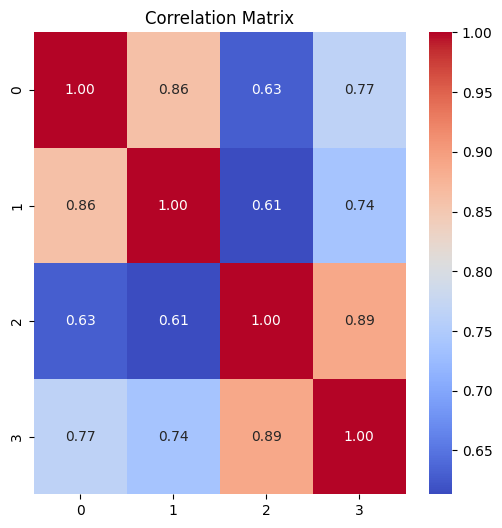

Proximity matrix:
[[0.         0.53851648 0.50990195 0.64807407 0.14142136 0.6164414 ]
 [0.53851648 0.         0.3        0.33166248 0.60827625 1.09087121]
 [0.50990195 0.3        0.         0.24494897 0.50990195 1.08627805]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407 1.16619038]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.         0.6164414 ]
 [0.6164414  1.09087121 1.08627805 1.16619038 0.6164414  0.        ]]


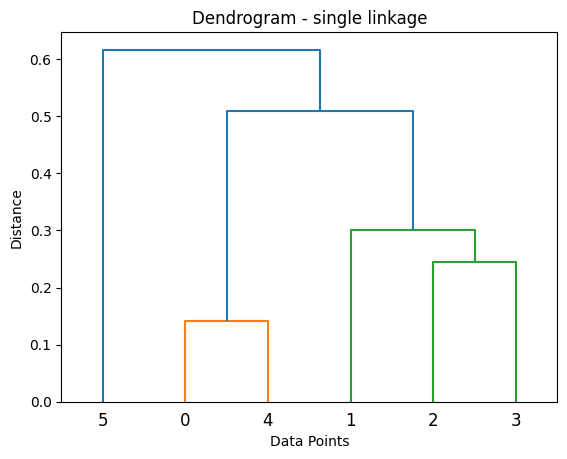

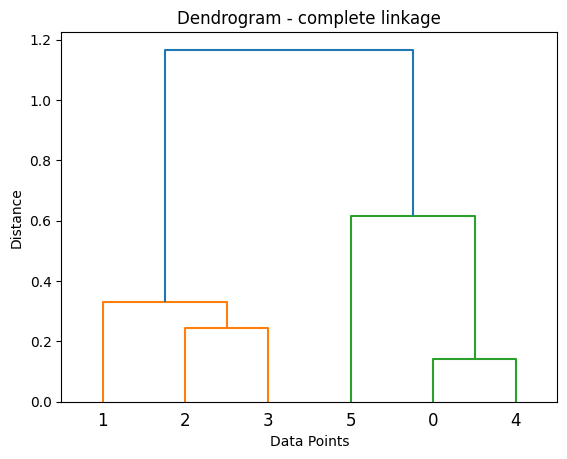

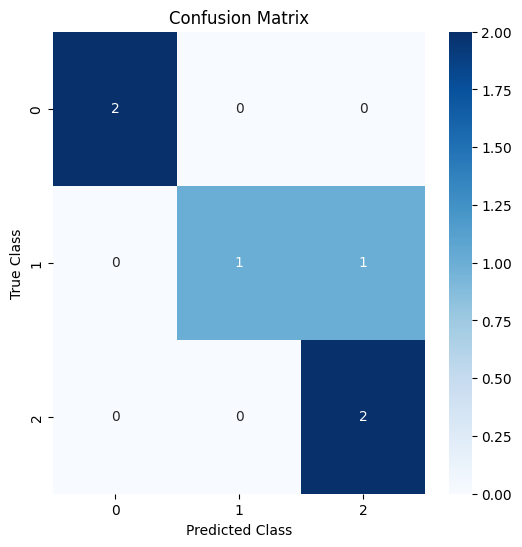

In [ ]:
# 9.AGGLOMERATIVE CLUSTERING

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import seaborn as sns

iris = load_iris()
data = iris.data[:6]
print(data)

def proximity_matrix(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.linalg.norm(data[i] - data[j])
            proximity_matrix[j, i] = proximity_matrix[i, j]
    return proximity_matrix

def plot_dendrogram(data, method):
    linkage_matrix = linkage(data, method=method)
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram - {method} linkage')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

def plot_confusion_matrix(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

def plot_correlation_matrix(data):
    correlation_matrix = np.corrcoef(data.T)
    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()


# Plot the correlation matrix
plot_correlation_matrix(data)

# Calculate the proximity matrix
print("Proximity matrix:")
print(proximity_matrix(data))

# Plot the dendrogram using single-linkage
plot_dendrogram(data, 'single')

# Plot the dendrogram using complete-linkage
plot_dendrogram(data, 'complete')

# Example of true and predicted labels
true_labels = np.array([0, 0, 1, 1, 2, 2])
predicted_labels = np.array([0, 0, 1, 2, 2, 2])

# Plot the confusion matrix
plot_confusion_matrix(true_labels, predicted_labels)

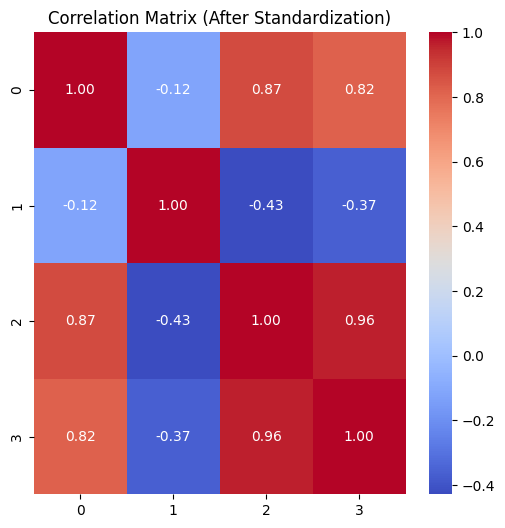

Shape of Data: (150, 4)
Shape of transformed Data: (150, 2)


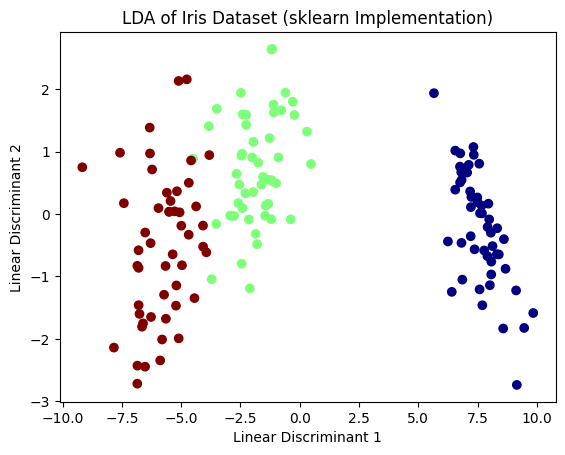

In [ ]:
# 10.A LDA

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the Iris dataset
X = load_iris().data
y = load_iris().target

# Perform data preprocessing - Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Calculate and plot the correlation matrix
correlation_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (After Standardization)')
plt.show()

# Perform LDA using sklearn
lda = LinearDiscriminantAnalysis(n_components=2)
X_projected = lda.fit_transform(X_scaled, y)

print("Shape of Data:", X.shape)
print("Shape of transformed Data:", X_projected.shape)

# Plot the results
ld1 = X_projected[:, 0]
ld2 = X_projected[:, 1]

plt.scatter(ld1, ld2, c=y, cmap="jet")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.title("LDA of Iris Dataset (sklearn Implementation)")
plt.show()

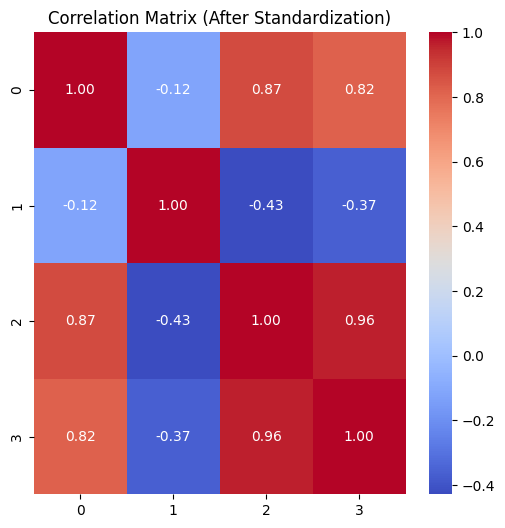

Shape of Data: (150, 4)
Shape of transformed Data: (150, 2)


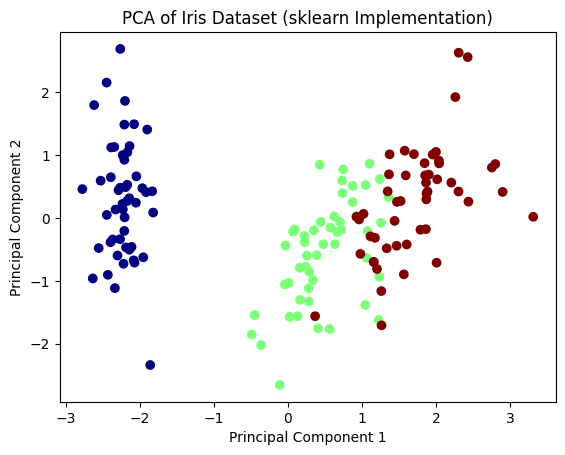

In [ ]:
# 10.B PCA

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA as SklearnPCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the Iris dataset
X = load_iris().data
y = load_iris().target

# Perform data preprocessing - Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate and plot the correlation matrix
correlation_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (After Standardization)')
plt.show()

# Perform PCA using sklearn
pca = SklearnPCA(n_components=2)
X_projected = pca.fit_transform(X_scaled)

print("Shape of Data:", X.shape)
print("Shape of transformed Data:", X_projected.shape)

# Plot the results
pc1 = X_projected[:, 0]
pc2 = X_projected[:, 1]

plt.scatter(pc1, pc2, c=y, cmap="jet")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.title("PCA of Iris Dataset (sklearn Implementation)")
plt.show()

In [ ]:
# 11.SLP

import numpy as np

# Activation function (step function)
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Define the training data for the AND function
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([[0], [0], [0], [1]])

# Define the training data for the OR function
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([[0], [1], [1], [1]])

# Define the Single-layer Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=1000):
        # Initialize weights to zero
        self.weights = np.zeros((input_size, 1))
        # Initialize bias to zero
        self.bias = 0
        # Set the learning rate and the number of training epochs
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train(self, X, y):
        # Training process
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                # Reshape inputs to column vector
                inputs = inputs.reshape(-1, 1)
                # Calculate linear output
                linear_output = np.dot(inputs.T, self.weights) + self.bias
                # Apply step function to get the prediction
                prediction = step_function(linear_output)
                # Calculate the error
                error = label - prediction
                # Update weights and bias based on the error
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

    def predict(self, X):
        # Prediction process
        linear_output = np.dot(X, self.weights) + self.bias
        return step_function(linear_output)

# Training the Perceptron for AND function
perceptron_and = Perceptron(input_size=2)
perceptron_and.train(X_and, y_and)

# Training the Perceptron for OR function
perceptron_or = Perceptron(input_size=2)
perceptron_or.train(X_or, y_or)

# Print training results for the AND function
print("AND Function Predictions:")
print(perceptron_and.predict(X_and))

# Print training results for the OR function
print("\nOR Function Predictions:")
print(perceptron_or.predict(X_or))

# Manually test specific input values for the AND function
and_test_input = np.array([[1, 1]])
print("\nAND Function Prediction for input [1, 1]:")
print(perceptron_and.predict(and_test_input))

# Manually test specific input values for the OR function
or_test_input = np.array([[0, 1]])
print("\nOR Function Prediction for input [0, 1]:")
print(perceptron_or.predict(or_test_input))

AND Function Predictions:
[[0]
 [0]
 [0]
 [1]]

OR Function Predictions:
[[0]
 [1]
 [1]
 [1]]

AND Function Prediction for input [1, 1]:
[[1]]

OR Function Prediction for input [0, 1]:
[[1]]


In [ ]:
# 12.MLP

import numpy as np

# Activation function (sigmoid) and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the training data for AND-NOT function
X_and_not = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_not = np.array([[0], [0], [1], [0]])

# Define the training data for XOR function
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# Define the Multi-layer Perceptron class with one hidden layer
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights for input to hidden layer
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)

        # Initialize weights for hidden to output layer
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)

        # Initialize biases for hidden layer
        self.bias_hidden = np.random.rand(1, hidden_size)

        # Initialize biases for output layer
        self.bias_output = np.random.rand(1, output_size)

    def forward(self, X):
        # Forward pass through the hidden layer
        self.hidden = sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)

        # Forward pass through the output layer
        self.output = sigmoid(np.dot(self.hidden, self.weights_hidden_output) + self.bias_output)
        return self.output

    def backward(self, X, y, output):
        # Calculate the error for the output layer
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        # Calculate the error for the hidden layer
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        # Update weights and biases
        self.weights_hidden_output += self.hidden.T.dot(output_delta)
        self.weights_input_hidden += X.T.dot(hidden_delta)
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True)
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True)

    def train(self, X, y, epochs):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

# Training the MLP for AND-NOT function
mlp_and_not = MLP(input_size=2, hidden_size=4, output_size=1)
mlp_and_not.train(X_and_not, y_and_not, epochs=5000)

# Training the MLP for XOR function
mlp_xor = MLP(input_size=2, hidden_size=4, output_size=1)
mlp_xor.train(X_xor, y_xor, epochs=5000)

# Print training results
print("AND-NOT Function Predictions:")
print(mlp_and_not.predict(X_and_not))

print("\nXOR Function Predictions:")
print(mlp_xor.predict(X_xor))

# Manually test specific input values
and_not_test_input = np.array([[0, 1]])
xor_test_input = np.array([[1, 0]])

print("\nAND-NOT Function Prediction for input [0, 1]:")
print(mlp_and_not.predict(and_not_test_input))

print("\nXOR Function Prediction for input [1, 0]:")
print(mlp_xor.predict(xor_test_input))

AND-NOT Function Predictions:
[[0]
 [0]
 [1]
 [0]]

XOR Function Predictions:
[[0]
 [1]
 [1]
 [0]]

AND-NOT Function Prediction for input [0, 1]:
[[0]]

XOR Function Prediction for input [1, 0]:
[[1]]
